**[LeetCode Link](https://leetcode-cn.com/problems/populating-next-right-pointers-in-each-node/solution/dong-hua-yan-shi-san-chong-shi-xian-116-tian-chong/)**

## BFS迭代
层层遍历，每层临时遍历的节点都会放到一个队列中。队列中保存了第i层节点的信息，将队列中的元素都串联一遍就可以了。
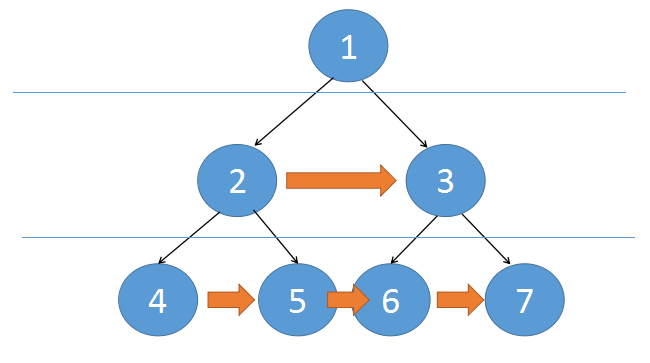
### 复杂度分析
* 时间复杂度:O(n)
* 空间复杂度:O(n)

In [ ]:
class Solution(object):
    def connect(self, root):
        """
        :type root: Node
        :rtype: Node
        """
        if not root:
            return root
        queue = [root]
        while queue:
            size = len(queue)
            # 将队列中的元素串联起来
            tmp = queue[0]
            for i in range(1,size):
                tmp.next = queue[i]
                tmp = queue[i]
            # 遍历队列中的每个元素，将每个元素的左右节点也放入队列中
            for _ in range(size):
                tmp = queue.pop(0)
                if tmp.left:
                    queue.append(tmp.left)
                if tmp.right:
                    queue.append(tmp.right)
        return root

## BFS迭代（O(1)空间复杂度）
完成后的串联树，其连接的方式有两种:
* 第一种是这两个串联的节点都有一个共同的父节点，通过父节点就可以将这两个子节点串联起来
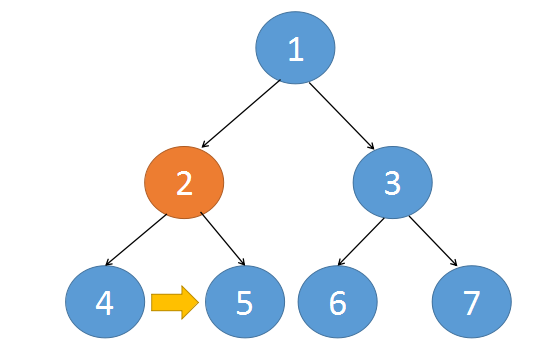

* 第二种是这两个串联的节点的父节点不同，对于这种情况，如果我们能将这一层的上一层串联好。那么可以通过父节点的```next```找到邻居，完成串联。
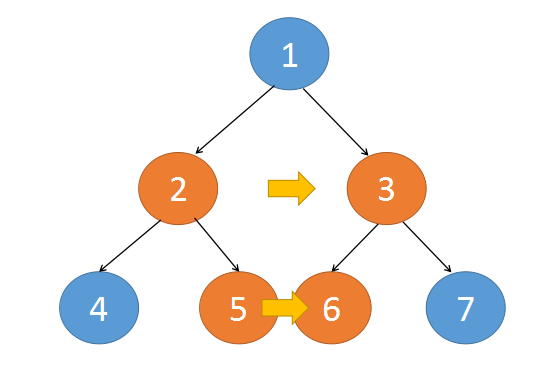
即```root.right.next => root.next.left```
这里我们需要保证root.next不为空就可以了。
也就是说当我们要串联第i层节点时，需要先完成第i-1层的节点串联
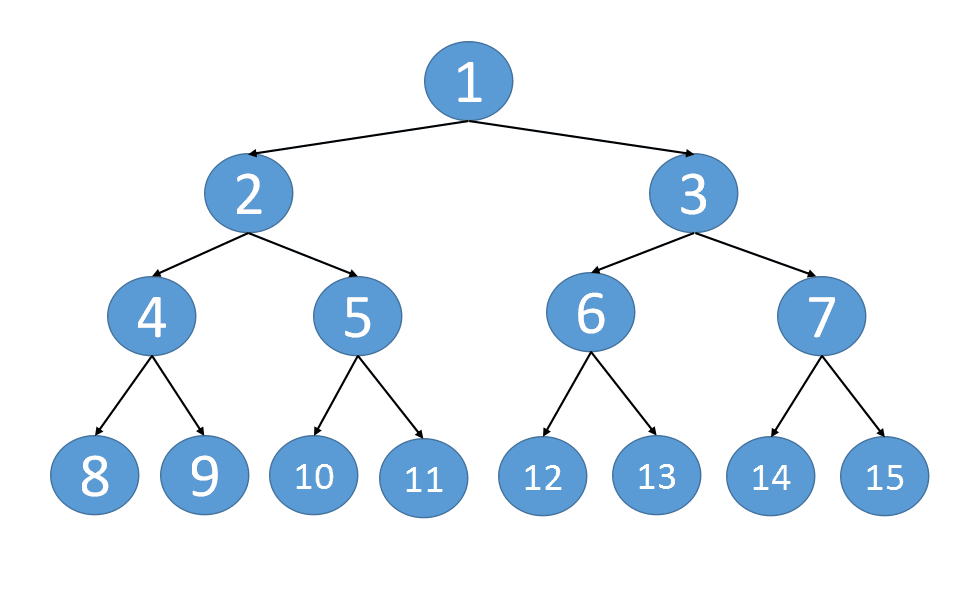

### 复杂度分析
* 时间复杂度:O(n)
* 空间复杂度:O(1)

In [ ]:
class Solution(object):
    def connect(self, root):
        """
        :type root: Node
        :rtype: Node
        """
        if not root:
            return root
        pre = root
        # 循环条件是当前节点的left不为空，当只有根节点
        # 或所有叶子节点都出串联完后循环就退出了
        while pre.left:
            tmp = pre
            while tmp:
                # 将tmp的左右节点都串联起来
                # 注:外层循环已经判断了当前节点的left不为空
                tmp.left.next = tmp.right
                # 下一个不为空说明上一层已经帮我们完成串联了
                if tmp.next:
                    tmp.right.next = tmp.next.left
                # 继续右边遍历
                tmp = tmp.next
            # 从下一层的最左边开始遍历	
            pre = pre.left
        return root

## 递归
上面两种方式是属于横向的视角，而递归则像是一个深度的视角。

以从上往下的方向看，1，2，3，5，6这几个节点在位置上都是紧挨着的，同时这几个节点都是左右串联的。
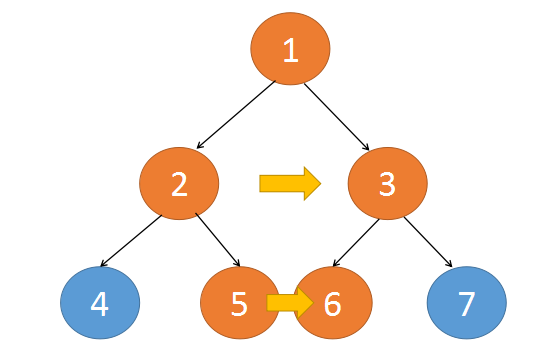
我们以当前节root点为起始，左右节点不断的深入下面，left节点不断往右走，right节点不断往左走，当这两个节点走到底后，整个纵深这段就完成了串联。

递归函数实现如下：
* 终止条件:当前节点为空时
* 函数内:以当前节点为起始，完成从上往下的纵深串联，再递归的调用当前节点left和right
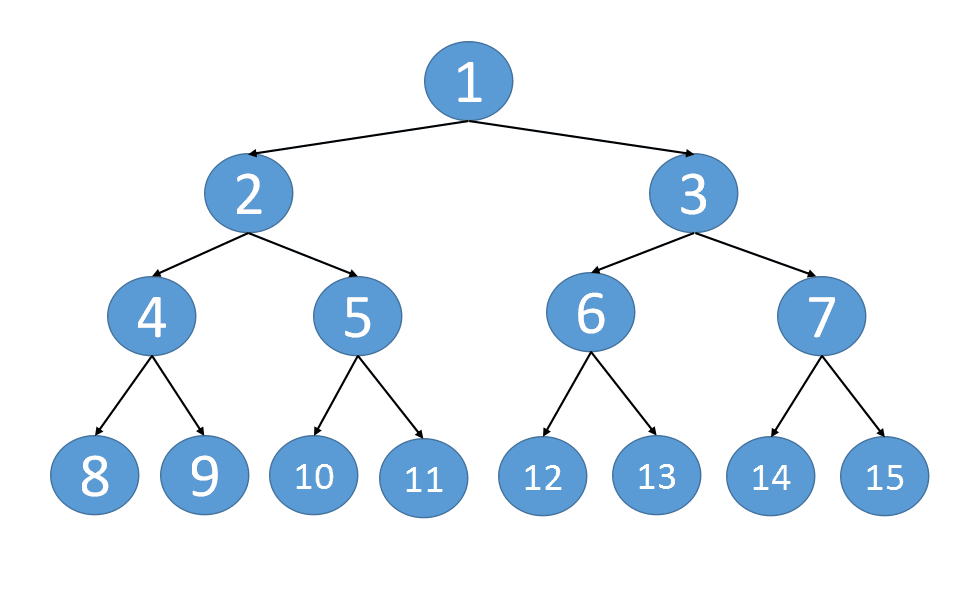

### 复杂度分析
* 时间复杂度:O(n)
* 空间复杂度:O(h)，h是树的高度

In [ ]:
class Solution(object):
    def connect(self, root):
        """
        :type root: Node
        :rtype: Node
        """
        def dfs(root):
            if not root:
                return
            left = root.left
            right = root.right
            # 配合动画演示理解这段，以root为起点，将整个纵深这段串联起来
            while left:
                left.next = right
                left = left.right
                right = right.left
            # 递归的调用左右节点，完成同样的纵深串联
            dfs(root.left)
            dfs(root.right)
        dfs(root)
        return root